<a href="https://colab.research.google.com/github/mahernher/Affirmations/blob/master/practica3_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3 Parte II. Clustering con sklearn

Para la segunda parte obligatoria de esta práctica vamos a utilizar la librería [sklearn](http://scikit-learn.org/stable/) para trabajar con distintos algoritmos de clustering. La librería sklearn es una librería de Python que proporciona una gran cantidad de algoritmos de aprendizaje automático. 

Como en el notebook de la parte I debes ir leyendo las explicaciones, ejecutando el código que se te proporciona, y respondiendo a los ejercicios planteados. 

Recuerda que para que los cambios se vayan guardando en tu repositorio de GitHub tienes que utilizar la opción *Save a Copy in GitHub...* del menú *File*.

Para nuestras pruebas con la libreria sklearn usaremos el fichero iris.csv. Este dataset es uno de los más utilizados en aprendizaje automático. Se trata de
una lista con 150 vectores de datos, cada uno de ellos con cuatro medidas numéricas sobre longitud y anchura de sépalo y pétalo de la flor de la
planta iris. Cada vector tiene asignado una de las tres posibles clasificaciones:
setosa, versiclor o virgínica. Puedes encontrar información sobre dicho dataset en  https://archive.ics.uci.edu/ml/datasets/Iris. 

Comenzamos descargando el dataset. 

In [1]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv -O iris.csv

--2023-03-15 15:41:14--  https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0.001s  

2023-03-15 15:41:14 (7.03 MB/s) - ‘iris.csv’ saved [4606/4606]



Para cargar este dataset vamos a utilizar la librería pandas.

In [2]:
import pandas as pd

Utilizando el siguiente comando cargamos los datos a partir del fichero iris.csv y los almacenamos en la variable df. 

In [3]:
df = pd.read_csv('iris.csv')

***
**Pregunta**
Muestra las 8 primeras filas que se obtienen al evaluar df. Para ello escribe el comando a ejecutar en la siguiente celda (podemos utilizar la sintaxis de slices para obtener filas de un DataFrame).

In [4]:
df.head(8)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


***

Para los algoritmos de clustering, la ultima columna de df no es necesaria ya que no vamos a utilizar la clase. Para eliminar esta columna usaremos el siguiente comando.

In [5]:
df_noclass = df.iloc[:,:-1]

df es un DataFrame, pero nosotros estamos interesados en almacenar los valores del dataset como una lista de listas que es el formato esperado por la libreria sklearn. Para hacer esta conversion usamos el siguiente comando.

In [6]:
irisValues = df_noclass.values

## K-means

Veámos como utilizar el algoritmo de [K-means de la librería sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). Lo primero es cargar dicha funcionalidad. Todos los algoritmos de clustering disponibles en la librería sklearn se encuentran en el módulo [sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html). Además todos los algoritmos heredan de [BaseEstimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), lo que nos permitirá intercambiar los algoritmos de manera sencilla.

In [7]:
from sklearn.cluster import KMeans

A continuación creamos un estimador usando dicha funcionalidad e indicándole el número de clusters a utilizar. Daros cuenta de que en el siguiente comando no indicamos el dataset, sino que simplemente iniciamos el algoritmo K-means, esto construye un objeto de la clase KMeans. Veremos que esta manera es la habitual para los algoritmos de clustering, y esto nos permitirá cambiar de algoritmo de manera sencilla.

In [8]:
estimatorKmeans = KMeans(n_clusters=3)

***
**Pregunta**
Busca en la documentación que otros parámetros se le puede pasar al constructor de la clase KMeans además del número de clusters. Responde en la siguiente celda, para ello haz doble click sobre la palabra Respuesta y edita la celda.

**Respuesta**

**n_clusters :** El numero de clusters que se van a formar.

**init:**{'k-means++', 'random'}. Que pueden ser uno de estos valores

Y mas parametros como estos: 

**'random'**,**n_init**,**max_iter**,**tol**,**verbose**,**random_state**,**copy_x **,**algorithm  **

***

In [9]:
??KMeans

A continuación vamos a calcular los clusters. Para ello utilizamos el método fit de la clase KMeans.

In [10]:
estimatorKmeans.fit(irisValues)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Como se puede observar el comando anterior nos devuelve la instancia de la clase KMeans, para acceder a dicha información tenemos que usar el atributo labels_ de la clase KMeans.

In [11]:
estimatorKmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

***
**Pregunta**

Ejecuta uno o varios comandos para averiguar a qué cluster se han asignado las instancias 5, 37 y 90 del dataset.

In [12]:
estimatorKmeans.labels_[5]

0

In [13]:
estimatorKmeans.labels_[37]

0

In [14]:
estimatorKmeans.labels_[90]

1

***

Otro de los atributos útiles que nos proporciona la clase KMeans es inertia_ que nos devuelve el valor de la función de coste.

***
**Pregunta**

¿Qué valor tiene la función de coste en nuestro caso?

In [15]:
estimatorKmeans.inertia_

78.940841426146

***

El siguiente código permite generar una imagen con la función coste para distintos valores de k, de este modo podemos elegir el valor de k basándonos en el método del codo.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline  

def drawElbow(maxClusters,data):
    kmeans = [KMeans(n_clusters=k).fit(data) for k in range(1,maxClusters)]
    costFunction = [estimator.inertia_ for estimator in kmeans]
    plt.plot(costFunction)
    plt.title("Cost function")
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

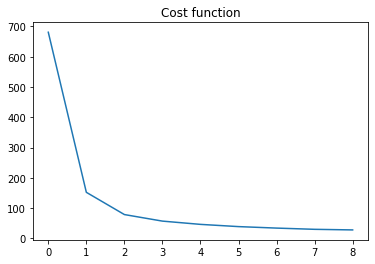

In [17]:
drawElbow(10,irisValues)

*** 
**Pregunta**

Teniendo en cuenta el gráfico anterior. ¿Qué número de clústeres consideras adecuado para este dataset?

**Respuesta**
8
***


La siguiente función toma tres argumentos: el resultado devuelto al llamar al atributo labels_ de un objeto KMeans, el dataset original (en nuestro caso df) y una clase (en nuestro ejemplo puede ser Iris-setosa, Iris-versicolor o Iris-virginica); y devuelva una lista con el número de instancias de esa clase para cada clúster. 

In [18]:
import numpy as np

def valida_iris(labels,dataset,clase):
    values = dataset.values
    res = np.zeros(3).astype("uint8")
    for i,instance in enumerate(values):
        if(instance[4]==clase):
            res[labels[i]]+=1
    return res

*** 
**Pregunta**

¿Qué resultados se obtienen para cada clase? A continuación se muestra el comando para la clase Iris-setosa. Proporciona en las celdas disponibles las llamadas a la función con las clases que quedan.


In [19]:
valida_iris(estimatorKmeans.labels_,df,'Iris-setosa')

array([50,  0,  0], dtype=uint8)

In [20]:
valida_iris(estimatorKmeans.labels_,df,'Iris-versicolor')

array([ 0, 48,  2], dtype=uint8)

In [21]:
valida_iris(estimatorKmeans.labels_,df,'Iris-virginica')

array([ 0, 14, 36], dtype=uint8)


***

## Mean shift

Veámos ahora como utilizar el algoritmo de [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift). De nuevo, lo primero es cargar dicha funcionalidad.

In [22]:
from sklearn.cluster import MeanShift

A continuación creamos un estimador usando dicha funcionalidad, y a continuación calculamos los clusters.

In [23]:
estimatorMeanShift = MeanShift()
estimatorMeanShift.fit(irisValues)

MeanShift()

Veremos que esto nos devuelve la instancia de la clase MeanShift, para acceder a dicha información tenemos que usar el atributo labels_.

In [24]:
estimatorMeanShift.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

*** 
**Pregunta**

¿Cuántos clusters sugiere el método de Mean Shift para el dataset de iris?

**Respuesta** 
2

***

In [25]:
estimatorMeanShift.fit(irisValues)

MeanShift()

*** 
**Pregunta**

Utilizando la función valida_iris, ¿qué resultados se obtienen para cada clase utilizando Mean Shift?

In [26]:
valida_iris(estimatorMeanShift.labels_,df,'Iris-setosa')

array([ 0, 50,  0], dtype=uint8)

In [27]:
valida_iris(estimatorMeanShift.labels_,df,'Iris-versicolar')

array([0, 0, 0], dtype=uint8)

In [28]:
valida_iris(estimatorMeanShift.labels_,df,'Iris-virginica')

array([50,  0,  0], dtype=uint8)

***

## DBSCAN 

Repetimos lo mismo para el algoritmo de clustering [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN).

*** 
**Pregunta**

¿Qué hace cada una de las siguientes instrucciones?

In [29]:
from sklearn.cluster import DBSCAN

estimatorDBSCAN = DBSCAN()
estimatorDBSCAN.fit(irisValues)
estimatorMeanShift.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Respuesta**
Crea un estimador y calculamos los clusters. Y con labels_ accedemos a dicha informacion 
***

epsilon = 0.5 min_samples = 5 Otros parametros: metric, metric_params, algorithm, leaf_size, p, n_jobs

*** 
**Pregunta**

Consulta la documentación de DBSCAN y responde a las siguientes preguntas. ¿Qué valores toma por defecto DBSCAN para los parámetros epsilon y min_samples? ¿Qué otros parámetros tiene este algoritmo de clustering en sklearn?

**Respuesta**

***

In [31]:
DBSCAN??

epsilon = 0.5 min_samples = 5 Otros parametros: metric, metric_params, algorithm, leaf_size, p, n_jobs


*** 
**Pregunta**

¿Cuántos clústeres sugiere el método de DBSCAN para el dataset de iris?

**Respuesta**

***

*** 
**Pregunta**

Utilizando la función valida_iris, ¿qué resultados se obtienen para cada clase utilizando DBSCAN?


In [ ]:
valida_iris(estimatorDBSCAN.labels_,df,'Iris-virginica')

In [ ]:
valida_iris(estimatorDBSCAN.labels_,df,'Iris-versicolor')

In [ ]:
valida_iris(estimatorDBSCAN.labels_,df,'Iris-setosa')

***

Guarda el fichero con la opción *Save a Copy in GitHub...* del menú *File*.